
# 1 - Imports and defining functions

In [2]:
import numpy as np

import meshplot as mp
import matplotlib.pyplot as plt

from pyFM.functional import FunctionalMapping
from project.evaluate import EvaluateModel # evaluation class
from pyFM.functional import FunctionalMapping # functional mapping class
from project.cfunctional import CoupledFunctionalMapping # coupled functional mapping class
from project.datasets import ShrecPartialDataset as SPD # Shrec dataset class
from project.datasets import FaustRep as FR # Faust dataset class
from project.datasets import Tosca as T # Tosca dataset class

def plot_mesh(myMesh,cmap=None):
    mp.plot(myMesh.vertlist, myMesh.facelist,c=cmap)
    
def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(myMesh1.vertlist, myMesh1.facelist, c=cmap1, s=[2, 2, 0])
    mp.subplot(myMesh2.vertlist, myMesh2.facelist, c=cmap2, s=[2, 2, 1], data=d)

def visu(vertices):
    min_coord,max_coord = np.min(vertices,axis=0,keepdims=True),np.max(vertices,axis=0,keepdims=True)
    cmap = (vertices-min_coord)/(max_coord-min_coord)
    return cmap

# 2- Evaluating Results

Definition of paths, **adjust to your local paths**

In [3]:
data_path_cp2p = "../../data/cp2p_dev"
data_path_faust = "../../data/MPI-FAUST_dev"
data_path_tosca = "../../data/SGP_dataset_off"

### Functional mapping on FAUST representation data

- preprocess_params arguments are given to model.preprocess()
- fit_params arguments are given to model.fit()
- data_params arguments are given to the dataclass initialization

In [3]:
evaluation = EvaluateModel(
    FunctionalMapping, FR, data_path_faust, refine=False, 
    preprocess_params={
        'n_ev': (35,35),  # Number of eigenvalues on source and Target
        # 'landmarks': np.loadtxt('data/landmarks.txt',dtype=int)[:5],  # loading 5 landmarks
        'subsample_step': 5,  # In order not to use too many descriptors
        'descr_type': 'WKS',  # WKS or HKS
    },
    fit_params={
        'w_descr': 1e0,
        'w_lap': 1e-2,
        'w_dcomm': 1e-1,
        'w_orient': 0
    },
    # data_params={
    #     'name': 'cuts',
    #     'selected': True
    # },
    verbose=False)

loading mesh tr_reg_000
loading mesh tr_reg_001
loading mesh tr_reg_002
Initialization done!


Call eval() function to evaluate the given dataset on the given model

In [4]:
evaluation.eval()

100%|██████████| 6/6 [02:02<00:00, 20.36s/it]


Mean accuracy results
	Basic FM : 67.31

Standard deviation of accuracy results
	Basic FM : 39.15



### Coupled Functional Mapping on Tosca Data 

In [4]:
evaluation_c = EvaluateModel(
    CoupledFunctionalMapping, T, data_path_tosca, refine=False, 
    preprocess_params={
        'n_ev': (35,35),  # Number of eigenvalues on source and Target
        # 'landmarks': np.loadtxt('data/landmarks.txt',dtype=int)[:5],  # loading 5 landmarks
        'subsample_step': 5,  # In order not to use too many descriptors
        'descr_type': 'WKS',  # WKS or HKS
    },
    fit_params={
        'mu_cons': 5e-2,
        'mu_LB': 5e0,
    },
    data_params={
        'name': 'cuts',
        'selected': True,
        'use_adj': True
    },
    verbose=False)

loading mesh cat0_partial1
loading mesh cat1_partial1
loading mesh cat3_partial2
loading mesh cat8_partial3
loading mesh cat9_partial2
loading mesh centaur0_partial2
loading mesh centaur0_partial3
loading mesh centaur5_partial1
loading mesh centaur5_partial4
loading mesh david0_partial1
loading mesh david12_partial2
loading mesh david13_partial3
loading mesh david13_partial6
loading mesh dog0_partial5
loading mesh dog10_partial3
loading mesh dog1_partial5
loading mesh dog8_partial6
loading mesh horse0_partial2
loading mesh horse15_partial6
loading mesh horse17_partial5
loading mesh michael15_partial6
loading mesh michael16_partial3
loading mesh michael18_partial4
loading mesh michael1_partial1
loading mesh victoria0_partial4
loading mesh victoria1_partial6
loading mesh victoria25_partial6
loading mesh victoria2_partial1
loading mesh wolf0_partial2
loading mesh wolf2_partial4
loading mesh wolf2_partial5
loading mesh wolf2_partial6
loading mesh cat0
loading mesh cat1
loading mesh cat10
l

In [5]:
evaluation_c.eval()

  0%|          | 0/32 [00:00<?, ?it/s]

         Current function value: 0.974954
         Iterations: 17
         Function evaluations: 83
         Gradient evaluations: 71


  3%|▎         | 1/32 [00:25<13:07, 25.39s/it]

         Current function value: 0.166280
         Iterations: 209
         Function evaluations: 455
         Gradient evaluations: 443


  6%|▋         | 2/32 [00:42<10:09, 20.33s/it]

         Current function value: 0.106475
         Iterations: 211
         Function evaluations: 486
         Gradient evaluations: 474


  9%|▉         | 3/32 [02:07<24:08, 49.94s/it]

         Current function value: 1.054918
         Iterations: 15
         Function evaluations: 65
         Gradient evaluations: 53


 12%|█▎        | 4/32 [02:59<23:48, 51.00s/it]

         Current function value: 0.990568
         Iterations: 16
         Function evaluations: 82
         Gradient evaluations: 71


 16%|█▌        | 5/32 [04:07<25:40, 57.07s/it]

         Current function value: 0.856393
         Iterations: 15
         Function evaluations: 77
         Gradient evaluations: 66


 19%|█▉        | 6/32 [05:24<27:40, 63.86s/it]

         Current function value: 0.821987
         Iterations: 16
         Function evaluations: 75
         Gradient evaluations: 63


 22%|██▏       | 7/32 [05:39<19:57, 47.90s/it]

         Current function value: 0.119507
         Iterations: 197
         Function evaluations: 444
         Gradient evaluations: 433


 25%|██▌       | 8/32 [06:27<19:05, 47.72s/it]

         Current function value: 1.072492
         Iterations: 18
         Function evaluations: 72
         Gradient evaluations: 61


 28%|██▊       | 9/32 [07:02<16:48, 43.87s/it]

         Current function value: 0.897582
         Iterations: 17
         Function evaluations: 82
         Gradient evaluations: 70


 31%|███▏      | 10/32 [07:48<16:17, 44.41s/it]

         Current function value: 1.139708
         Iterations: 17
         Function evaluations: 72
         Gradient evaluations: 60


 34%|███▍      | 11/32 [08:40<16:19, 46.67s/it]

         Current function value: 0.155575
         Iterations: 232
         Function evaluations: 503
         Gradient evaluations: 491


 38%|███▊      | 12/32 [09:23<15:12, 45.60s/it]

         Current function value: 0.900308
         Iterations: 14
         Function evaluations: 68
         Gradient evaluations: 57


 41%|████      | 13/32 [09:59<13:30, 42.66s/it]

         Current function value: 0.857406
         Iterations: 21
         Function evaluations: 122
         Gradient evaluations: 110


 44%|████▍     | 14/32 [10:35<12:12, 40.71s/it]

         Current function value: 0.952572
         Iterations: 14
         Function evaluations: 98
         Gradient evaluations: 86


 47%|████▋     | 15/32 [11:13<11:16, 39.82s/it]

         Current function value: 0.931512
         Iterations: 15
         Function evaluations: 86
         Gradient evaluations: 75


 50%|█████     | 16/32 [12:00<11:15, 42.22s/it]

         Current function value: 0.168086
         Iterations: 195
         Function evaluations: 438
         Gradient evaluations: 427


 53%|█████▎    | 17/32 [12:41<10:28, 41.89s/it]

         Current function value: 0.893770
         Iterations: 17
         Function evaluations: 91
         Gradient evaluations: 80


 56%|█████▋    | 18/32 [13:37<10:45, 46.08s/it]

         Current function value: 1.032365
         Iterations: 19
         Function evaluations: 74
         Gradient evaluations: 62


 59%|█████▉    | 19/32 [14:30<10:23, 47.96s/it]

         Current function value: 0.912958
         Iterations: 11
         Function evaluations: 85
         Gradient evaluations: 73


 62%|██████▎   | 20/32 [15:20<09:42, 48.54s/it]

         Current function value: 0.169335
         Iterations: 144
         Function evaluations: 343
         Gradient evaluations: 331


 66%|██████▌   | 21/32 [16:08<08:53, 48.46s/it]

         Current function value: 0.887137
         Iterations: 16
         Function evaluations: 106
         Gradient evaluations: 93


 69%|██████▉   | 22/32 [16:50<07:45, 46.59s/it]

         Current function value: 0.232006
         Iterations: 212
         Function evaluations: 498
         Gradient evaluations: 487


 72%|███████▏  | 23/32 [17:33<06:49, 45.45s/it]

         Current function value: 0.187040
         Iterations: 304
         Function evaluations: 647
         Gradient evaluations: 636


 75%|███████▌  | 24/32 [18:14<05:53, 44.14s/it]

         Current function value: 0.906906
         Iterations: 14
         Function evaluations: 67
         Gradient evaluations: 55


 78%|███████▊  | 25/32 [18:55<05:02, 43.21s/it]

         Current function value: 1.175135
         Iterations: 18
         Function evaluations: 83
         Gradient evaluations: 72


 81%|████████▏ | 26/32 [19:35<04:13, 42.18s/it]

         Current function value: 0.763144
         Iterations: 42
         Function evaluations: 162
         Gradient evaluations: 150


 84%|████████▍ | 27/32 [20:24<03:40, 44.17s/it]

         Current function value: 0.189604
         Iterations: 204
         Function evaluations: 461
         Gradient evaluations: 450


 88%|████████▊ | 28/32 [20:36<02:18, 34.70s/it]

         Current function value: 0.192890
         Iterations: 319
         Function evaluations: 644
         Gradient evaluations: 635


 91%|█████████ | 29/32 [21:22<01:54, 38.14s/it]

         Current function value: 0.838036
         Iterations: 12
         Function evaluations: 103
         Gradient evaluations: 91


 94%|█████████▍| 30/32 [22:13<01:23, 41.81s/it]

         Current function value: 0.902845
         Iterations: 15
         Function evaluations: 96
         Gradient evaluations: 84


 97%|█████████▋| 31/32 [22:58<00:42, 42.79s/it]

         Current function value: 0.830526
         Iterations: 18
         Function evaluations: 76
         Gradient evaluations: 64


100%|██████████| 32/32 [24:30<00:00, 45.94s/it]


Mean accuracy results
	Basic FM : 582.36

Standard deviation of accuracy results
	Basic FM : 118.24



### Functional Mapping on Tosca Data

In [5]:
evaluation_cfm = EvaluateModel(
    FunctionalMapping, T, data_path_tosca, refine=False, 
    preprocess_params={
        'n_ev': (35,35),  # Number of eigenvalues on source and Target
        # 'landmarks': np.loadtxt('data/landmarks.txt',dtype=int)[:5],  # loading 5 landmarks
        'subsample_step': 5,  # In order not to use too many descriptors
        'descr_type': 'WKS',  # WKS or HKS
    },
    fit_params={
        'w_descr': 1e0,
        'w_lap': 1e-2,
        'w_dcomm': 1e-1,
        'w_orient': 0
    },
    data_params={
        'name': 'cuts',
        'selected': True,
        'use_adj': True
    },
    verbose=False)

loading mesh cat0_partial1
loading mesh cat1_partial1
loading mesh cat3_partial2
loading mesh cat8_partial3
loading mesh cat9_partial2
loading mesh centaur0_partial2
loading mesh centaur0_partial3
loading mesh centaur5_partial1
loading mesh centaur5_partial4
loading mesh david0_partial1
loading mesh david12_partial2
loading mesh david13_partial3
loading mesh david13_partial6
loading mesh dog0_partial5
loading mesh dog10_partial3
loading mesh dog1_partial5
loading mesh dog8_partial6
loading mesh horse0_partial2
loading mesh horse15_partial6
loading mesh horse17_partial5
loading mesh michael15_partial6
loading mesh michael16_partial3
loading mesh michael18_partial4
loading mesh michael1_partial1
loading mesh victoria0_partial4
loading mesh victoria1_partial6
loading mesh victoria25_partial6
loading mesh victoria2_partial1
loading mesh wolf0_partial2
loading mesh wolf2_partial4
loading mesh wolf2_partial5
loading mesh wolf2_partial6
loading mesh cat0
loading mesh cat1
loading mesh cat10
l

In [6]:
evaluation_cfm.eval()

100%|██████████| 32/32 [21:01<00:00, 39.42s/it]


Mean accuracy results
	Basic FM : 599.64

Standard deviation of accuracy results
	Basic FM : 135.21



### Load results

**adjust paths to your local paths**

In [46]:
def load_res(path):
    with open(path, "r") as f:
        return [float(x) for x in f.read().split(", ")]


# FM_res = load_res(f'data/eval/distances_FunctionalMapping_Tosca.txt')
# CFM_res = load_res(f'data/eval/distances_CoupledFunctionalMapping_Tosca.txt')

FM_res = load_res(f'data/eval/distances_FunctionalMapping_FaustRep.txt')
CFM_res = load_res(f'data/eval/distances_CoupledFunctionalMapping_FaustRep.txt')

### Plot results

In [47]:
def plot_res(x, y):
    x = np.sort(x)
    f_x = np.array(range(len(x)))/float(len(x))
    y = np.sort(y)
    f_y = np.array(range(len(y)))/float(len(y))

    plt.plot(x, f_x, label='FM')
    plt.plot(y, f_y, label='CFM')
    plt.title('Geod. distance distribution (FAUST representations)')
    plt.xlabel('Geodesic error')
    plt.ylabel('% Correspondences')
    plt.xlim([0.0, 1.5])
    plt.ylim([0.0, 1.0])
    plt.legend()

    plt.savefig(f"data/eval/FM_v_CFM_Faust.png", bbox_inches='tight', dpi=200)


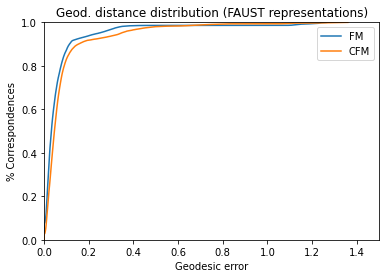

In [48]:
plot_res(FM_res, CFM_res)